In [ ]:
#-----------------------------------------------------------------------------------------
# Name:        Day 75 - 100 Days of Code
# Title:       Advanced - Google Trends Data: Resampling and Visualising Time Series
#
# Author:      Erick Rico
# Created:     07/08/2025
#-----------------------------------------------------------------------------------------

# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

# Data Exploration

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

### Tesla

In [10]:
print(df_tesla.shape)
print(df_tesla.columns)
df_tesla.describe()

(124, 3)
Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')


,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.00,124.00
mean,8.73,50.96
std,5.87,65.91
min,2.00,3.90
25%,3.75,7.35
50%,8.00,44.65
75%,12.00,58.99
max,31.00,498.32


In [8]:
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [14]:
df_tesla["MONTH"].head(10)

0    2010-06-01
1    2010-07-01
2    2010-08-01
3    2010-09-01
4    2010-10-01
5    2010-11-01
6    2010-12-01
7    2011-01-01
8    2011-02-01
9    2011-03-01
Name: MONTH, dtype: object

In [15]:
df_tesla["MONTH"] = pd.to_datetime(df_tesla["MONTH"])
df_tesla["MONTH"].diff().value_counts()

MONTH
31 days    72
30 days    41
28 days     7
29 days     3
Name: count, dtype: int64

In [16]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.77
1,2010-07-01,3,3.99
2,2010-08-01,2,3.90
3,2010-09-01,2,4.08
4,2010-10-01,2,4.37


### Unemployment Data

In [17]:
print(df_unemployment.shape)
print(df_unemployment.columns)
df_unemployment.describe()

(181, 3)
Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')


,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.00,181.00
mean,35.11,6.22
std,20.48,1.89
min,14.00,3.70
25%,21.00,4.70
50%,26.00,5.40
75%,45.00,7.80
max,100.00,10.00


In [18]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


In [19]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.70
1,2004-02,33,5.60
2,2004-03,25,5.80
3,2004-04,29,5.60
4,2004-05,23,5.60


In [20]:
df_unemployment["MONTH"] = pd.to_datetime(df_unemployment["MONTH"])
df_tesla["MONTH"].diff().value_counts()

MONTH
31 days    72
30 days    41
28 days     7
29 days     3
Name: count, dtype: int64

### Bitcoin

In [28]:
print(df_btc_search.shape)
print(df_btc_search.columns)
print(df_btc_search.head())
df_btc_search.describe()


(73, 2)
Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')
       MONTH  BTC_NEWS_SEARCH
0 2014-09-01                5
1 2014-10-01                4
2 2014-11-01                4
3 2014-12-01                4
4 2015-01-01                5


,MONTH,BTC_NEWS_SEARCH
count,73,73.00
mean,2017-08-31 09:32:03.287671296,15.01
min,2014-09-01 00:00:00,3.00
25%,2016-03-01 00:00:00,5.00
50%,2017-09-01 00:00:00,14.00
75%,2019-03-01 00:00:00,18.00
max,2020-09-01 00:00:00,100.00
std,NaN,15.15


In [25]:
df_btc_search["MONTH"] = pd.to_datetime(df_btc_search["MONTH"])
df_btc_search["MONTH"].diff().value_counts()

MONTH
31 days    42
30 days    24
28 days     4
29 days     2
Name: count, dtype: int64

In [29]:
print(df_btc_price.shape)
print(df_btc_price.columns)
print(df_btc_price.head())
df_btc_price.describe()

(2204, 3)
Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')
         DATE  CLOSE        VOLUME
0  2014-09-17 457.33 21,056,800.00
1  2014-09-18 424.44 34,483,200.00
2  2014-09-19 394.80 37,919,700.00
3  2014-09-20 408.90 36,863,600.00
4  2014-09-21 398.82 26,580,100.00


,CLOSE,VOLUME
count,"2,203.00","2,203.00"
mean,"4,429.42","8,043,622,390.14"
std,"4,148.15","11,765,285,602.39"
min,178.10,"5,914,570.00"
25%,433.63,"60,299,150.00"
50%,"3,637.52","2,018,889,984.00"
75%,"7,997.37","13,224,781,071.00"
max,"19,497.40","74,156,772,074.00"


In [31]:
df_btc_price["DATE"] = pd.to_datetime(df_btc_price["DATE"])
df_btc_price["DATE"].diff().value_counts()

DATE
1 days    2203
Name: count, dtype: int64

In [32]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [48]:
# 3 maneras distintas de checar valores nulos

print(f'Missing values for Tesla?: {df_tesla.isna().any().any()}\n')
print(f'Missing values for U/E?: \n{df_unemployment.isna().any()}\n')
print(f'Missing values for BTC Search?: {df_btc_search.isna().sum().sum()}')

Missing values for Tesla?: False

Missing values for U/E?: 
MONTH                     False
UE_BENEFITS_WEB_SEARCH    False
UNRATE                    False
dtype: bool

Missing values for BTC Search?: 0


In [49]:
# Otra manera más

print(f'Missing values for BTC price?: \n{df_btc_price.isna().sum()}')

Missing values for BTC price?: 
DATE      0
CLOSE     1
VOLUME    1
dtype: int64


In [50]:
print(f'Number of missing values: {df_btc_price.isna().sum().sum()}')

Number of missing values: 2


In [55]:
df_btc_price[df_btc_price["CLOSE"].isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [56]:
df_btc_price[df_btc_price["VOLUME"].isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found. 

In [51]:
clean_df_btc_price = df_btc_price.dropna().copy()

In [54]:
clean_df_btc_price.isna().any().any()

np.False_

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [ ]:
# Ya lo había hecho en las primeras celdas para todos los df

In [59]:
type(df_tesla["MONTH"][0])

pandas._libs.tslibs.timestamps.Timestamp

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [87]:
resampled_df_m_btcprice = clean_df_btc_price.resample("MS", on="DATE").last()

In [88]:
print(resampled_df_m_btcprice.shape)
resampled_df_m_btcprice.head()

(73, 2)


,CLOSE,VOLUME
DATE,,
2014-09-01,386.94,"34,707,300.00"
2014-10-01,338.32,"12,545,400.00"
2014-11-01,378.05,"9,194,440.00"
2014-12-01,320.19,"13,942,900.00"
2015-01-01,217.46,"23,348,200.00"


# Data Visualisation

### Notebook Formatting & Style Helpers

In [66]:
# Estilo random elegido
plt.style.use('seaborn-v0_8-darkgrid')

In [64]:
# Create locators for ticks on the time axis

import matplotlib.dates as mdates

# Mostrar ticks cada año
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [ ]:
# Register date converters to avoid warning messages

pd.plotting.register_matplotlib_converters()

## Otra forma
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

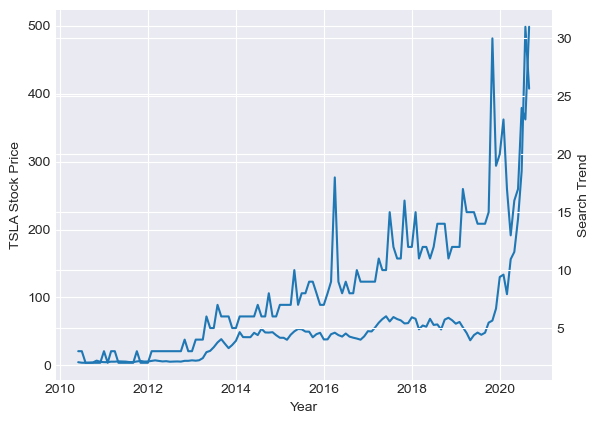

In [67]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"])
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"])

ax1.set_xlabel("Year")
ax1.set_ylabel("TSLA Stock Price")
ax2.set_ylabel("Search Trend")
plt.show()

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

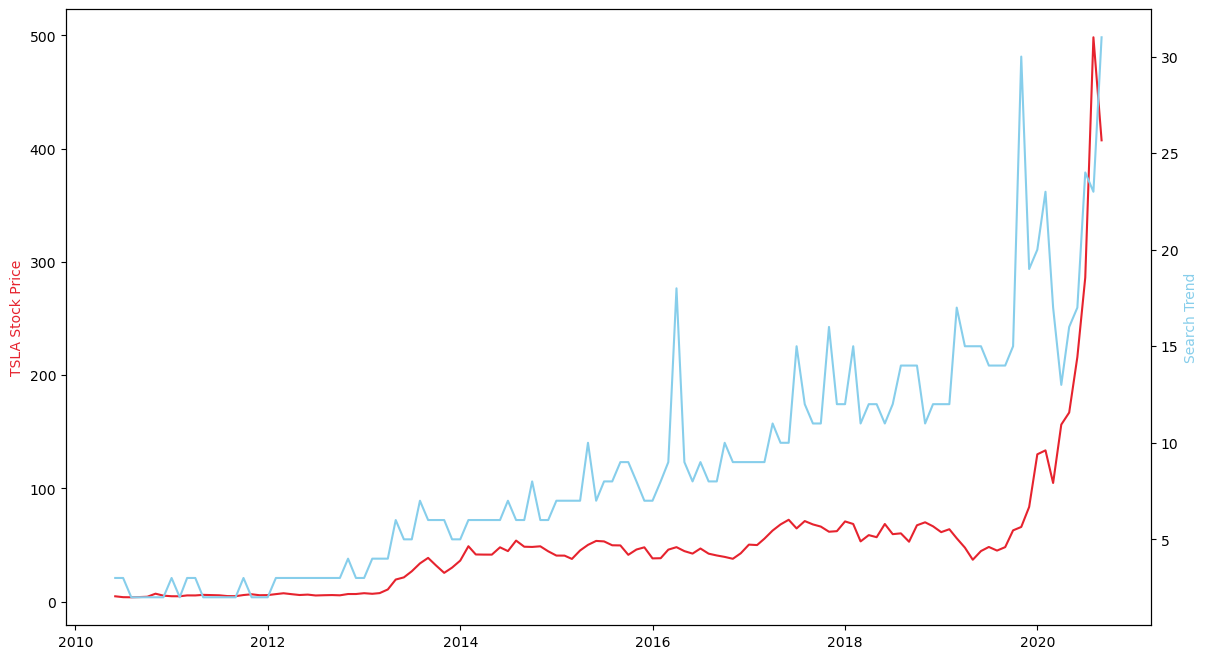

In [ ]:
plt.style.use('default')

fig, ax1 = plt.subplots(figsize=(14, 8), dpi=100)

# Datos
ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"], 
         color="#E6232E", label="TSLA Stock Price")
ax2 = ax1.twinx()
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], 
         color="skyblue", label="Search Trend")

# Rotar las fechas para mejor lectura
plt.xticks(rotation=45)

ax1.set_ylabel("TSLA Stock Price", color="#E6232E")
ax2.set_ylabel("Search Trend", color="skyblue")
plt.show()

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

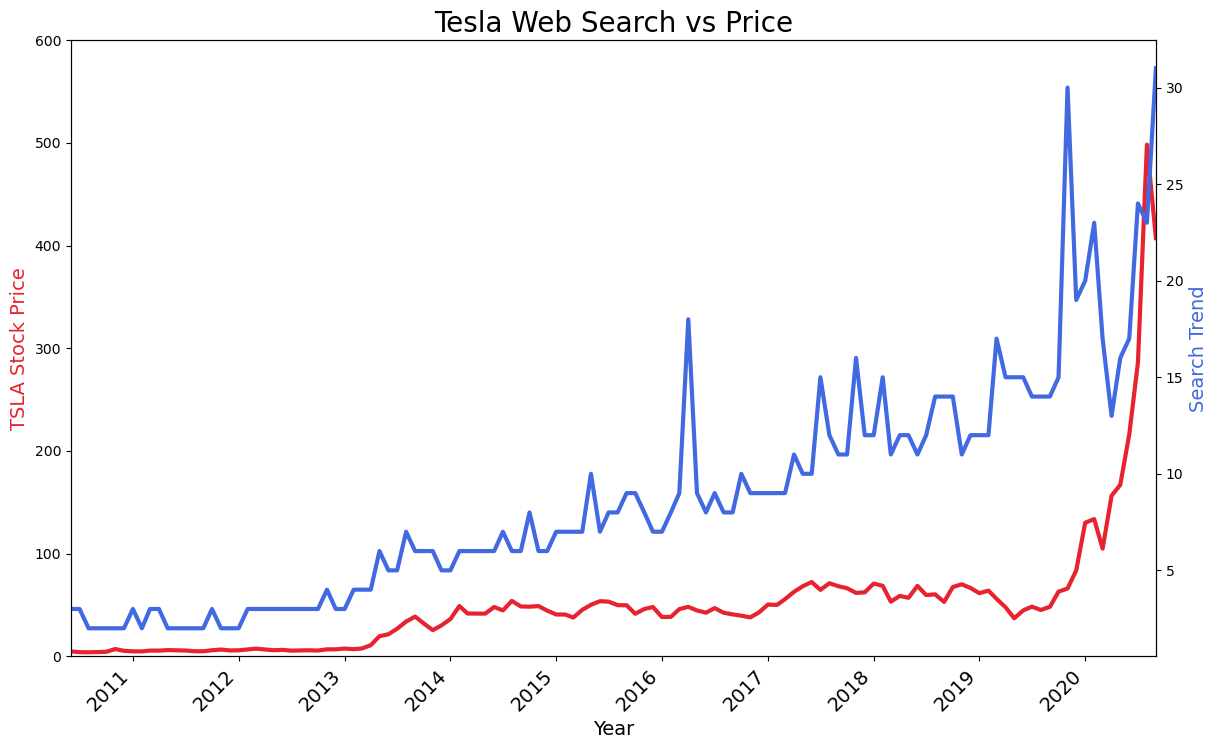

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 8), dpi=100)

# Datos
ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"], 
         color="#E6232E", label="TSLA Stock Price", lw=3)
ax2 = ax1.twinx()
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], 
         color="royalblue", label="Search Trend", lw=3)

# Usar locators y formatters para el eje x
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)

# Rotar las fechas para mejor lectura
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", fontsize=14)

# Poner límites a los ejes
ax1.set_xlim([df_tesla["MONTH"].min(), df_tesla["MONTH"].max()])
ax1.set_ylim([0,600])

ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("TSLA Stock Price", color="#E6232E", fontsize=14)
ax2.set_ylabel("Search Trend", color="royalblue", fontsize=14)
plt.title("Tesla Web Search vs Price", fontsize=20)
plt.show()

How to add tick formatting for dates on the x-axis. 

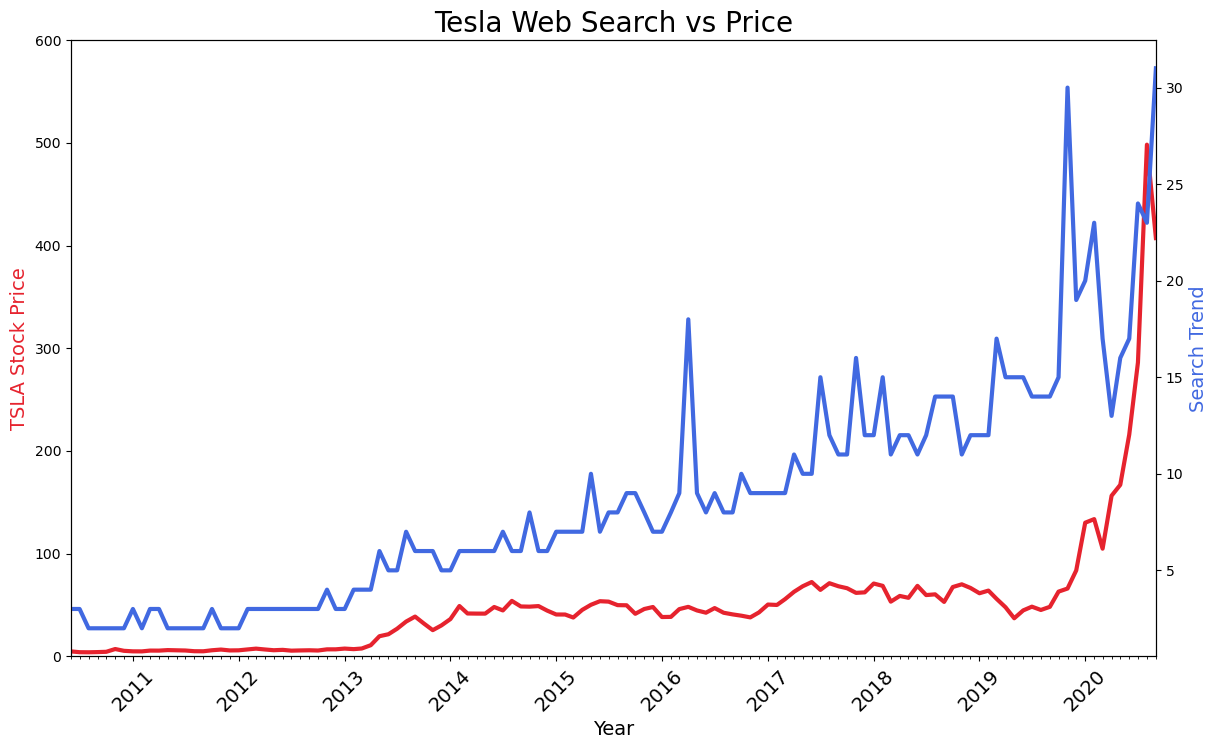

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 8), dpi=100)

# Datos
ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"], 
         color="#E6232E", label="TSLA Stock Price", lw=3)
ax2 = ax1.twinx()
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], 
         color="royalblue", label="Search Trend", lw=3)

# Usar locators y formatters para el eje x
ax1.xaxis.set_major_locator(years) # major tick marks
ax1.xaxis.set_major_formatter(years_fmt) # year style
ax1.xaxis.set_minor_locator(months) # 12 minor ticks marks per year

# Rotar las fechas para mejor lectura
plt.setp(ax1.get_xticklabels(), rotation=45, fontsize=14)

# Poner límites a los ejes
ax1.set_xlim([df_tesla["MONTH"].min(), df_tesla["MONTH"].max()])
ax1.set_ylim([0,600])

ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("TSLA Stock Price", color="#E6232E", fontsize=14)
ax2.set_ylabel("Search Trend", color="royalblue", fontsize=14)
plt.title("Tesla Web Search vs Price", fontsize=20)
plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [89]:
print(resampled_df_m_btcprice.head())
df_btc_search.head()

            CLOSE        VOLUME
DATE                           
2014-09-01 386.94 34,707,300.00
2014-10-01 338.32 12,545,400.00
2014-11-01 378.05  9,194,440.00
2014-12-01 320.19 13,942,900.00
2015-01-01 217.46 23,348,200.00


,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


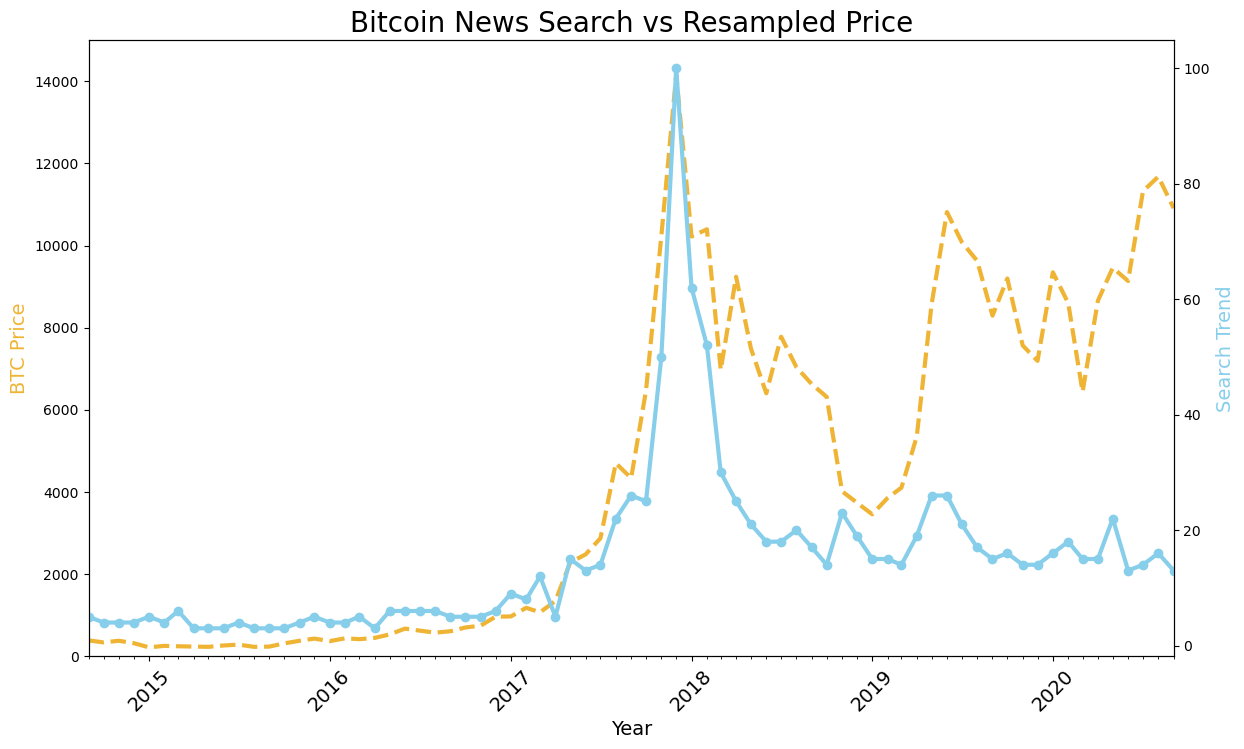

In [99]:
fig, ax1 = plt.subplots(figsize=(14, 8), dpi=100)

# Datos
ax1.plot(df_btc_search["MONTH"], resampled_df_m_btcprice["CLOSE"], 
         color="#F0B434", label="BTC Price", lw=3, ls="--")
ax2 = ax1.twinx()
ax2.plot(df_btc_search["MONTH"], df_btc_search["BTC_NEWS_SEARCH"], 
         color="skyblue", label="Search Trend", lw=3, marker="o")

# Usar locators y formatters para el eje x
ax1.xaxis.set_major_locator(years) # major tick marks
ax1.xaxis.set_major_formatter(years_fmt) # year style
ax1.xaxis.set_minor_locator(months) # 12 minor ticks marks per year

# Rotar las fechas para mejor lectura
plt.setp(ax1.get_xticklabels(), rotation=45, fontsize=14)

# Poner límites a los ejes
ax1.set_xlim([df_btc_search["MONTH"].min(), df_btc_search["MONTH"].max()])
ax1.set_ylim(bottom=0,top=15000)

ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("BTC Price", color="#F0B434", fontsize=14)
ax2.set_ylabel("Search Trend", color="skyblue", fontsize=14)
plt.title("Bitcoin News Search vs Resampled Price", fontsize=20)
plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

In [101]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MONTH                   181 non-null    datetime64[ns]
 1   UE_BENEFITS_WEB_SEARCH  181 non-null    int64         
 2   UNRATE                  181 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.4 KB


In [102]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.70
1,2004-02-01,33,5.60
2,2004-03-01,25,5.80
3,2004-04-01,29,5.60
4,2004-05-01,23,5.60


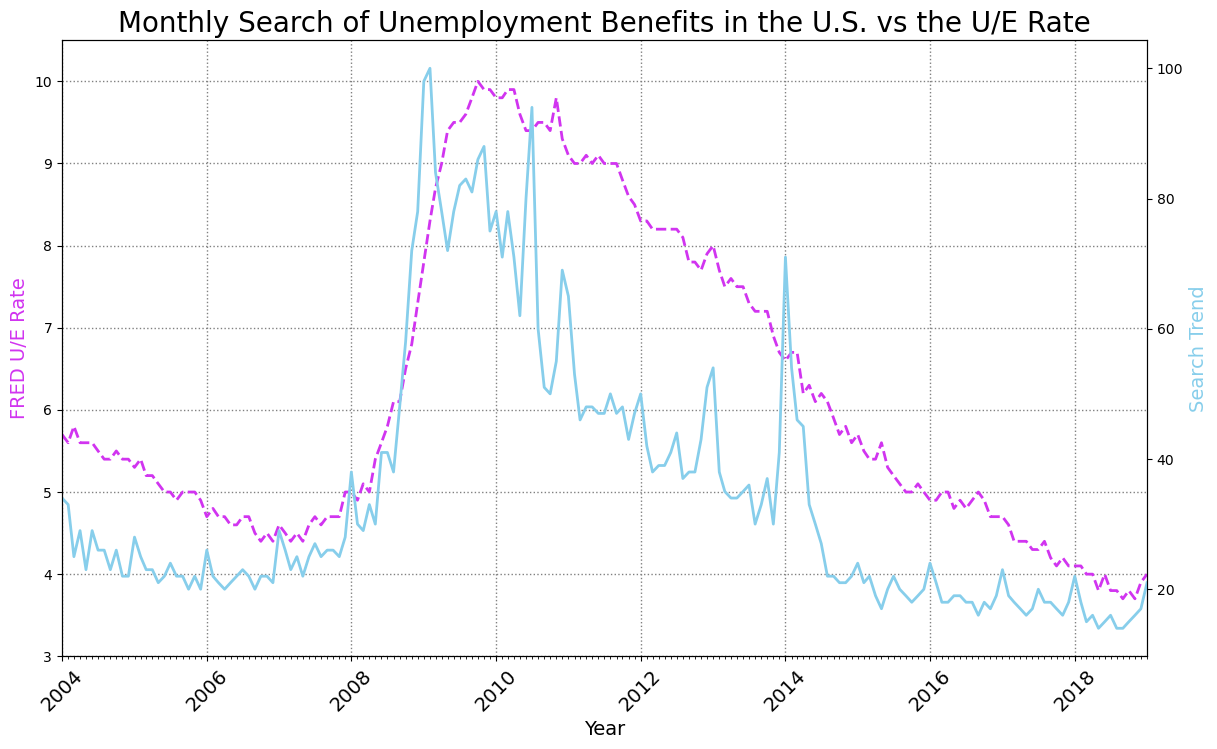

In [146]:
fig, ax1 = plt.subplots(figsize=(14, 8), dpi=100)

# Datos
ax1.plot(df_unemployment["MONTH"], df_unemployment["UNRATE"], 
         color="#D134F0", label="FRED U/E Rate", lw=2, ls="--")
ax2 = ax1.twinx()
ax2.plot(df_unemployment["MONTH"], df_unemployment["UE_BENEFITS_WEB_SEARCH"], 
         color="skyblue", label="Search Trend", lw=2)

# Usar locators y formatters para el eje x
ax1.xaxis.set_major_formatter(years_fmt) # year style
ax1.xaxis.set_minor_locator(months) # 24 minor ticks marks per year

# Rotar las fechas para mejor lectura
plt.setp(ax1.get_xticklabels(), rotation=45, fontsize=14)

# Poner límites a los ejes
ax1.set_xlim([df_unemployment["MONTH"].min(), df_unemployment["MONTH"].max()])
ax1.set_ylim(bottom=3,top=10.5)

ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("FRED U/E Rate", color="#D134F0", fontsize=14)
ax2.set_ylabel("Search Trend", color="skyblue", fontsize=14)
plt.title("Monthly Search of Unemployment Benefits in the U.S. vs the U/E Rate", fontsize=20)

ax1.grid(ls=":", color="grey", lw=1)
plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


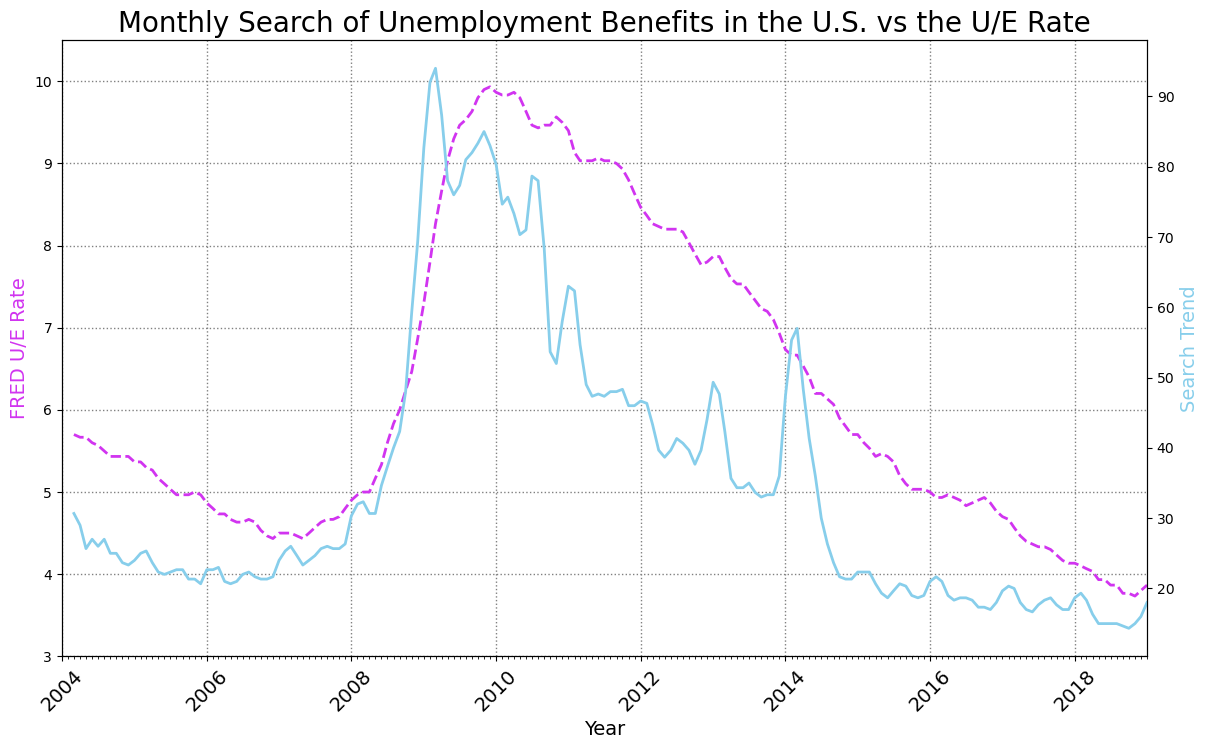

In [147]:
rolled_df_ue_3 = df_unemployment[["UNRATE", "UE_BENEFITS_WEB_SEARCH"]].rolling(window=3).mean()

fig, ax1 = plt.subplots(figsize=(14, 8), dpi=100)

# Datos
ax1.plot(df_unemployment["MONTH"], rolled_df_ue_3["UNRATE"], 
         color="#D134F0", label="FRED U/E Rate (3mo avg)", lw=2, ls="--")
ax2 = ax1.twinx()
ax2.plot(df_unemployment["MONTH"], rolled_df_ue_3["UE_BENEFITS_WEB_SEARCH"], 
         color="skyblue", label="Search Trend (3mo avg)", lw=2)

# Usar locators y formatters para el eje x
ax1.xaxis.set_major_formatter(years_fmt) # year style
ax1.xaxis.set_minor_locator(months) # 24 minor ticks marks per year

# Rotar las fechas para mejor lectura
plt.setp(ax1.get_xticklabels(), rotation=45, fontsize=14)

# Poner límites a los ejes
ax1.set_xlim([df_unemployment["MONTH"].min(), df_unemployment["MONTH"].max()])
ax1.set_ylim(bottom=3,top=10.5)

ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("FRED U/E Rate", color="#D134F0", fontsize=14)
ax2.set_ylabel("Search Trend", color="skyblue", fontsize=14)
plt.title("Monthly Search of Unemployment Benefits in the U.S. vs the U/E Rate", fontsize=20)

ax1.grid(ls=":", color="grey", lw=1)
plt.show()

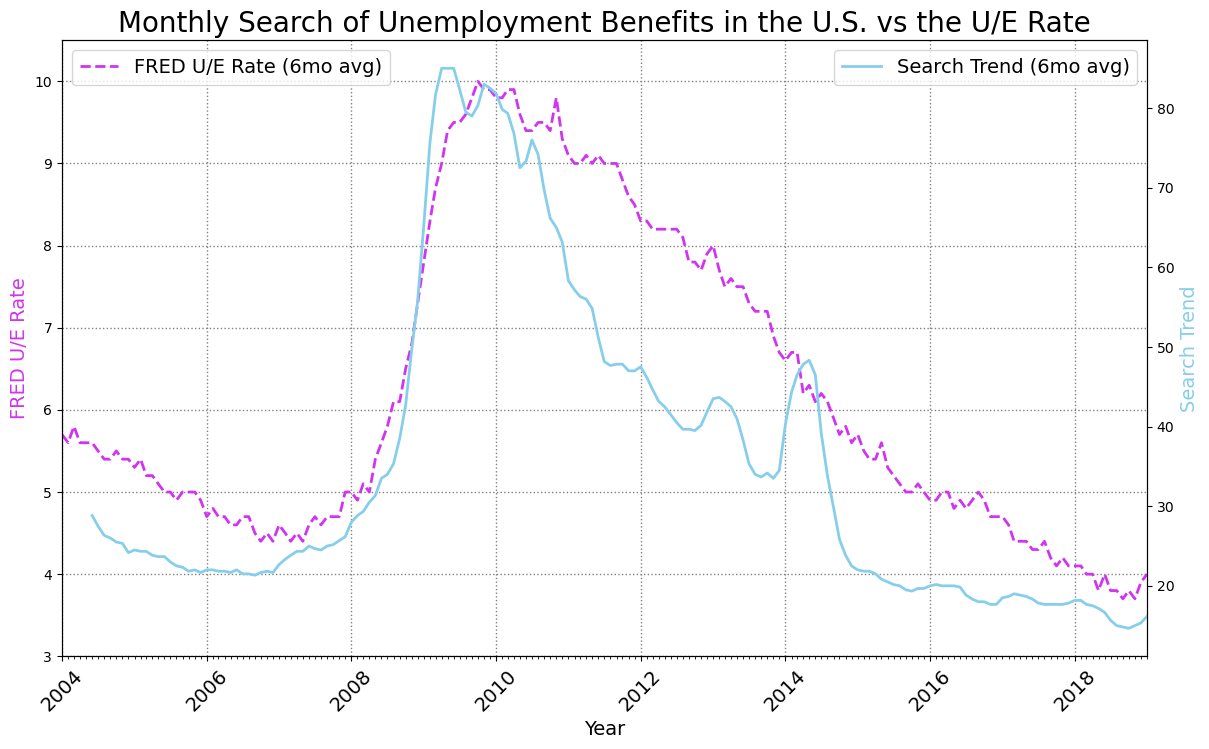

In [148]:
rolled_df_ue_6 = df_unemployment[["UE_BENEFITS_WEB_SEARCH"]].rolling(window=6).mean()

fig, ax1 = plt.subplots(figsize=(14, 8), dpi=100)

# Datos
ax1.plot(df_unemployment["MONTH"], df_unemployment["UNRATE"], 
         color="#D134F0", label="FRED U/E Rate (6mo avg)", lw=2, ls="--")
ax2 = ax1.twinx()
ax2.plot(df_unemployment["MONTH"], rolled_df_ue_6["UE_BENEFITS_WEB_SEARCH"], 
         color="skyblue", label="Search Trend (6mo avg)", lw=2)

# Usar locators y formatters para el eje x
ax1.xaxis.set_major_formatter(years_fmt) # year style
ax1.xaxis.set_minor_locator(months) # 24 minor ticks marks per year

# Rotar las fechas para mejor lectura
plt.setp(ax1.get_xticklabels(), rotation=45, fontsize=14)

# Poner límites a los ejes
ax1.set_xlim([df_unemployment["MONTH"].min(), df_unemployment["MONTH"].max()])
ax1.set_ylim(bottom=3,top=10.5)

ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("FRED U/E Rate", color="#D134F0", fontsize=14)
ax2.set_ylabel("Search Trend", color="skyblue", fontsize=14)
plt.title("Monthly Search of Unemployment Benefits in the U.S. vs the U/E Rate", fontsize=20)

ax1.grid(ls=":", color="grey", lw=1)
ax1.legend(loc="upper left", fontsize=14)
ax2.legend(loc="upper right", fontsize=14)
plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [150]:
df_ue_2020 = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv")

In [151]:
df_ue_2020.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.70
1,2004-02,8,5.60
2,2004-03,7,5.80
3,2004-04,8,5.60
4,2004-05,6,5.60


In [152]:
df_ue_2020["MONTH"] = pd.to_datetime(df_ue_2020["MONTH"])
df_ue_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MONTH                   200 non-null    datetime64[ns]
 1   UE_BENEFITS_WEB_SEARCH  200 non-null    int64         
 2   UNRATE                  200 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.8 KB


In [153]:
df_ue_2020.isna().any().any()

np.False_

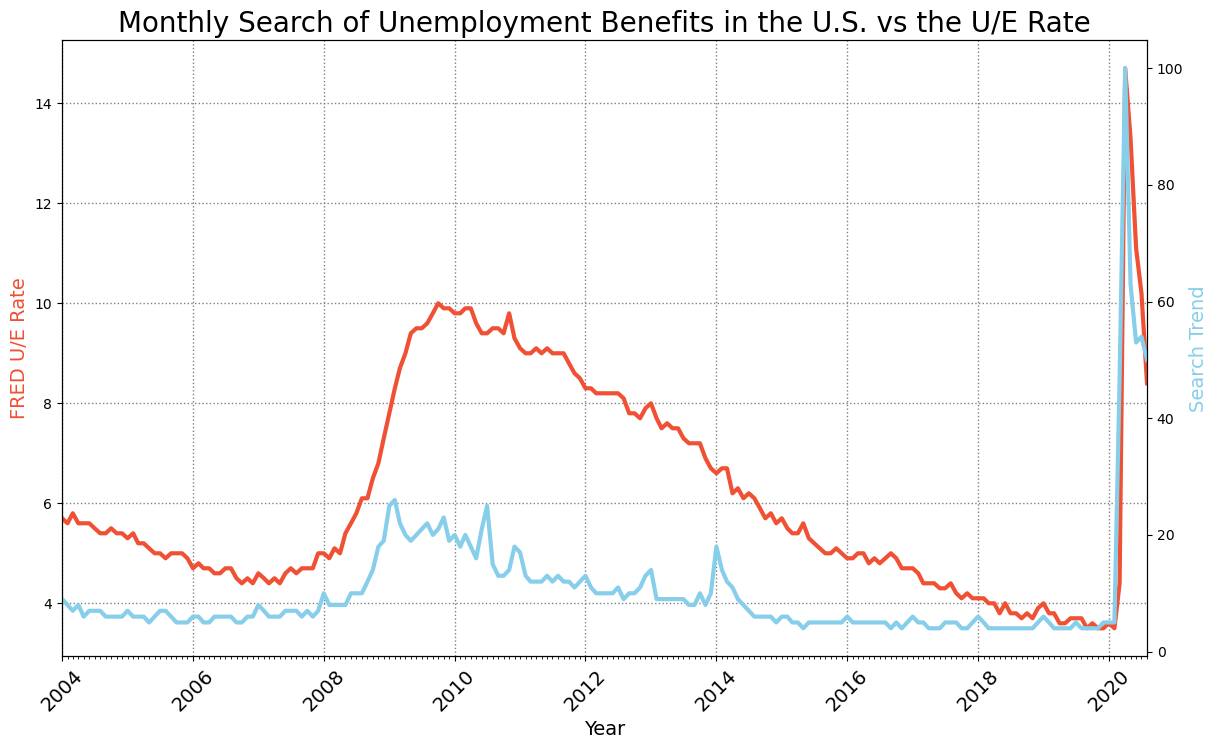

In [156]:
fig, ax1 = plt.subplots(figsize=(14, 8), dpi=100)

# Datos
ax1.plot(df_ue_2020["MONTH"], df_ue_2020["UNRATE"], 
         color="#F05034", label="FRED U/E Rate", lw=3)
ax2 = ax1.twinx()
ax2.plot(df_ue_2020["MONTH"], df_ue_2020["UE_BENEFITS_WEB_SEARCH"], 
         color="skyblue", label="Search Trend", lw=3)

# Usar locators y formatters para el eje x
ax1.xaxis.set_major_formatter(years_fmt) # year style
ax1.xaxis.set_minor_locator(months) # 24 minor ticks marks per year

# Rotar las fechas para mejor lectura
plt.setp(ax1.get_xticklabels(), rotation=45, fontsize=14)

# Poner límites a los ejes
ax1.set_xlim([df_ue_2020["MONTH"].min(), df_ue_2020["MONTH"].max()])

ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("FRED U/E Rate", color="#F05034", fontsize=14)
ax2.set_ylabel("Search Trend", color="skyblue", fontsize=14)
plt.title("Monthly Search of Unemployment Benefits in the U.S. vs the U/E Rate", fontsize=20)

ax1.grid(ls=":", color="grey", lw=1)
plt.show()